# 2D Gaussian Probability Density Function in Quantitative Finance

Quantitative analysts (quants) use 2D Gaussian Probability Density Function (PDF) plots in various scenarios, especially in the context of risk management, statistical modeling, and financial engineering. This notebook explores how 2D Gaussian PDFs are applied in:

1. Risk Management
2. Portfolio Optimization
3. Derivatives Pricing
4. Statistical Arbitrage
5. Machine Learning and Data Science

## Learning Goals and Objectives

- Understand the concept and mathematical formulation of a 2D Gaussian PDF.
- Apply 2D Gaussian PDFs to model risks and returns in financial portfolios.
- Visualize the impact of correlation between asset returns using 2D Gaussian plots.
- Explore real-world applications in risk management, portfolio optimization, derivatives pricing, statistical arbitrage, and machine learning.
    

## Importing Necessary Libraries and Data

We'll use the `yfinance` library to download historical price data for SPY, QQQ, and DAX.
    

## Mathematical Formulation of a 2D Gaussian PDF

A 2D Gaussian PDF is defined by the mean vector \( \mu \) and covariance matrix \( \Sigma \). The probability density function is given by:

\[ f(x, y) = 
rac{1}{2\pi \sqrt{|\Sigma|}} \exp \left( -
rac{1}{2} egin{bmatrix} x - \mu_x & y - \mu_y \end{bmatrix} \Sigma^{-1} egin{bmatrix} x - \mu_x \\ y - \mu_y \end{bmatrix} 
ight) \]

where:
- \( \mu = [\mu_x, \mu_y]^T \) is the mean vector.
- \( \Sigma \) is the covariance matrix.
- \( |\Sigma| \) is the determinant of the covariance matrix.
    

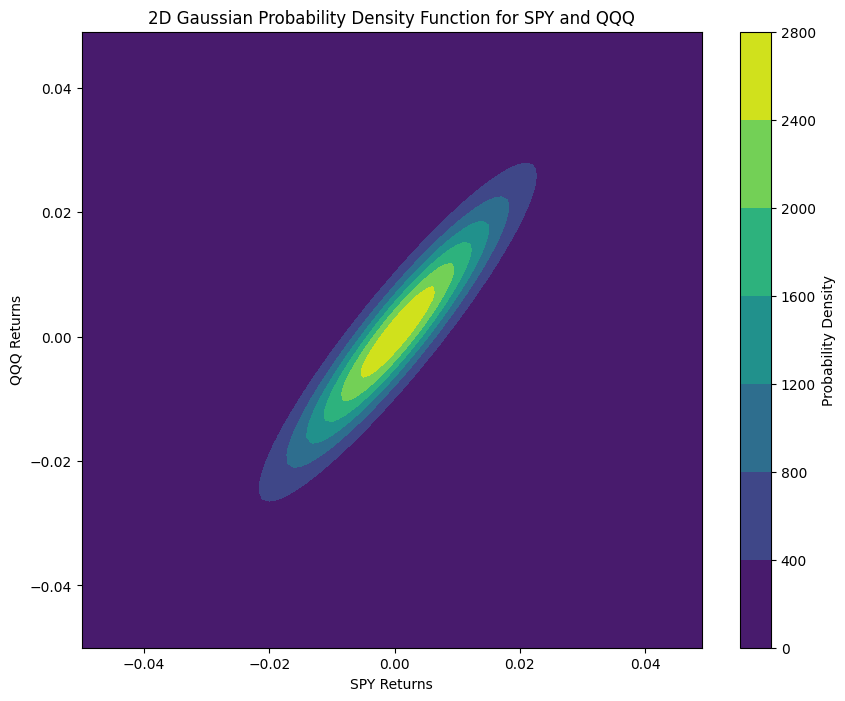

In [9]:
# Define the mean vector and covariance matrix using SPY and QQQ returns
mu = returns[['SPY', 'QQQ']].mean().values
sigma = returns[['SPY', 'QQQ']].cov().values

# Create a grid of (x, y) points
x, y = np.mgrid[-0.05:0.05:.001, -0.05:0.05:.001]
pos = np.dstack((x, y))

# Create the multivariate Gaussian distribution
rv = multivariate_normal(mu, sigma)

# Calculate the probability density function values
z = rv.pdf(pos)

# Plot the 2D Gaussian PDF
plt.figure(figsize=(10, 8))
plt.contourf(x, y, z, cmap='viridis')
plt.title('2D Gaussian Probability Density Function for SPY and QQQ')
plt.xlabel('SPY Returns')
plt.ylabel('QQQ Returns')
plt.colorbar(label='Probability Density')
plt.show()
    

## 1. Risk Management

### Value-at-Risk (VaR)

Value-at-Risk (VaR) is a measure used to estimate the potential loss in the value of a portfolio. By modeling asset returns with a Gaussian distribution, we can calculate the VaR, which quantifies the worst expected loss over a given time frame at a certain confidence level.

### Stress Testing

Stress testing involves simulating extreme market conditions to assess their impact on portfolios. Using 2D Gaussian PDFs to model the distribution of returns allows quants to prepare for unlikely but severe market events.
    

In [10]:
# Example: Calculate VaR for a portfolio using 2D Gaussian PDF

confidence_level = 0.95
portfolio_returns = rv.rvs(size=1000)

# Calculate the VaR at the 95% confidence level
var = np.percentile(portfolio_returns, (1 - confidence_level) * 100)
print(f"Value-at-Risk (VaR) at {confidence_level*100}% confidence level: {var}")
    

Value-at-Risk (VaR) at 95.0% confidence level: -0.019549302911957965


## 2. Portfolio Optimization

### Mean-Variance Optimization

The Gaussian distribution is fundamental to Modern Portfolio Theory (MPT). Quants use the mean and variance of asset returns to construct an efficient frontier of optimal portfolios that maximize return for a given level of risk.

### Correlation and Covariance Analysis

Understanding the joint distribution of returns helps in estimating the correlation and covariance between different assets, which is crucial for diversification and risk reduction.
    

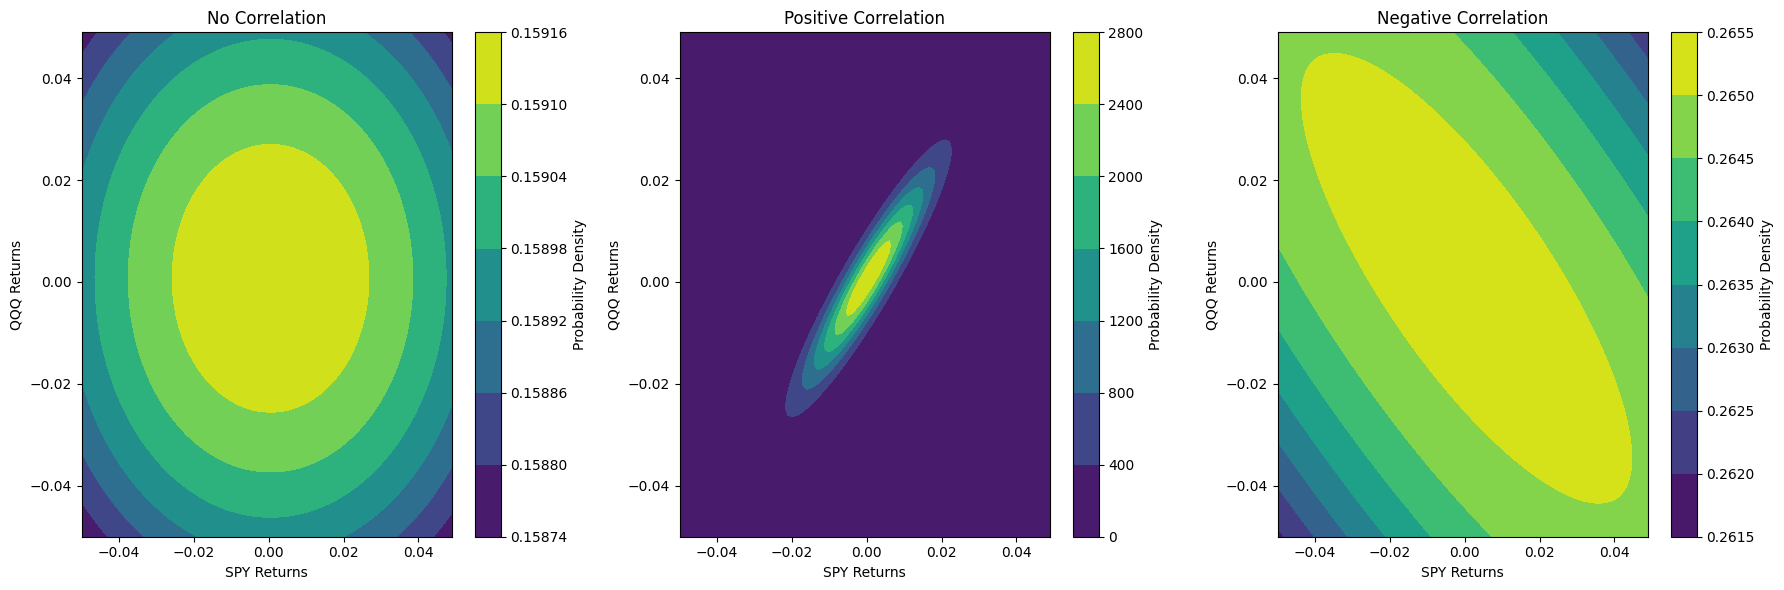

In [18]:
# Example: Visualize the impact of correlation on the joint distribution of returns

# Different covariance matrices to represent different correlations
sigma_no_corr = np.array([[1, 0], [0, 1]]) # No correlation
sigma_pos_corr = returns[['SPY', 'QQQ']].cov().values # Actual positive correlation
sigma_neg_corr = np.array([[1, -0.8], [-0.8, 1]]) # Negative correlation (hypothetical)

# Create the multivariate Gaussian distributions
rv_no_corr = multivariate_normal(mu, sigma_no_corr)
rv_pos_corr = multivariate_normal(mu, sigma_pos_corr)
rv_neg_corr = multivariate_normal(mu, sigma_neg_corr)

# Calculate the probability density function values for each case
z_no_corr = rv_no_corr.pdf(pos)
z_pos_corr = rv_pos_corr.pdf(pos)
z_neg_corr = rv_neg_corr.pdf(pos)

# Plot the 2D Gaussian PDFs
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.contourf(x, y, z_no_corr, cmap='viridis')
plt.title('No Correlation')
plt.xlabel('SPY Returns')
plt.ylabel('QQQ Returns')
plt.colorbar(label='Probability Density')

plt.subplot(1, 3, 2)
plt.contourf(x, y, z_pos_corr, cmap='viridis')
plt.title('Positive Correlation')
plt.xlabel('SPY Returns')
plt.ylabel('QQQ Returns')
plt.colorbar(label='Probability Density')

plt.subplot(1, 3, 3)
plt.contourf(x, y, z_neg_corr, cmap='viridis')
plt.title('Negative Correlation')
plt.xlabel('SPY Returns')
plt.ylabel('QQQ Returns')
plt.colorbar(label='Probability Density')

plt.tight_layout()
plt.show()
    

## 3. Derivatives Pricing

### Option Pricing Models

Models like the Black-Scholes assume that stock returns follow a log-normal distribution. Quants use this assumption to derive fair prices for options and other derivatives.

### Monte Carlo Simulations

Gaussian distributions are often used in Monte Carlo simulations to model the random paths of asset prices, helping in pricing complex derivatives and assessing their risk.
    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26604\4108808362.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S0 = data['SPY'][-1]  # Last closing price of SPY


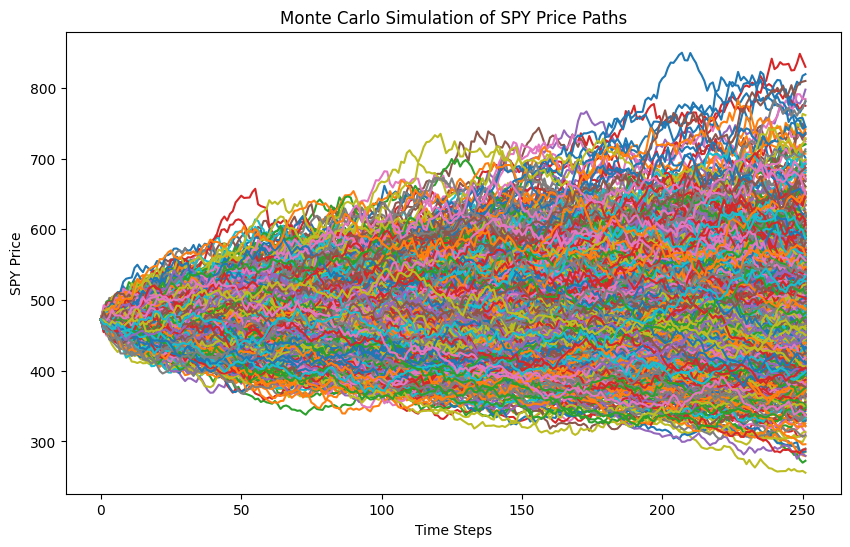

In [15]:
# Example: Simulate asset price paths using Monte Carlo simulation

# Parameters for the simulation
S0 = data['SPY'][-1]  # Last closing price of SPY
T = 1  # Time to maturity (1 year)
r = 0.05  # Risk-free rate
sigma = returns['SPY'].std() * np.sqrt(252)  # Annualized volatility
num_simulations = 1000  # Number of simulations
num_steps = 252  # Number of time steps (daily)

# Simulate asset price paths
dt = T / num_steps
price_paths = np.zeros((num_steps, num_simulations))
price_paths[0] = S0

for t in range(1, num_steps):
    z = np.random.standard_normal(num_simulations)
    price_paths[t] = price_paths[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Plot the simulated price paths
plt.figure(figsize=(10, 6))
plt.plot(price_paths)
plt.title('Monte Carlo Simulation of SPY Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('SPY Price')
plt.show()
    

## 4. Statistical Arbitrage

### Pairs Trading

Quants use Gaussian models to identify pairs of correlated assets. By modeling the spread between the prices of these pairs as a Gaussian process, they can devise strategies to exploit mean-reverting behavior.

### Factor Models

In constructing statistical arbitrage models, quants often assume that the returns of assets are driven by a set of common factors that are normally distributed. This helps in identifying mispriced assets and constructing hedged portfolios.
    

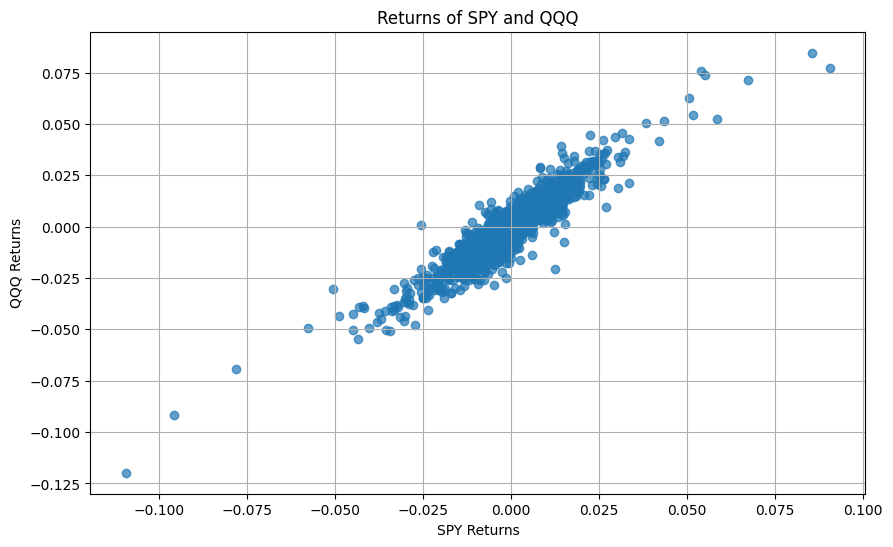

Correlation coefficient between SPY and QQQ: 0.9290108028732408


In [16]:
# Example: Identify pairs of correlated assets using 2D Gaussian PDF

# Use SPY and QQQ returns
asset1_returns = returns['SPY']
asset2_returns = returns['QQQ']

# Plot the returns of the two assets
plt.figure(figsize=(10, 6))
plt.scatter(asset1_returns, asset2_returns, alpha=0.7)
plt.title('Returns of SPY and QQQ')
plt.xlabel('SPY Returns')
plt.ylabel('QQQ Returns')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = np.corrcoef(asset1_returns, asset2_returns)[0, 1]
print(f"Correlation coefficient between SPY and QQQ: {correlation}")
    

## 5. Machine Learning and Data Science

### Clustering and Classification

Gaussian Mixture Models (GMMs) are used for clustering data points into different groups based on their likelihood of belonging to a particular Gaussian distribution. This is useful in identifying regimes or states in financial markets.

### Anomaly Detection

By modeling the normal behavior of an asset or portfolio returns using a Gaussian distribution, quants can detect anomalies or outliers that may indicate significant events or errors.
    

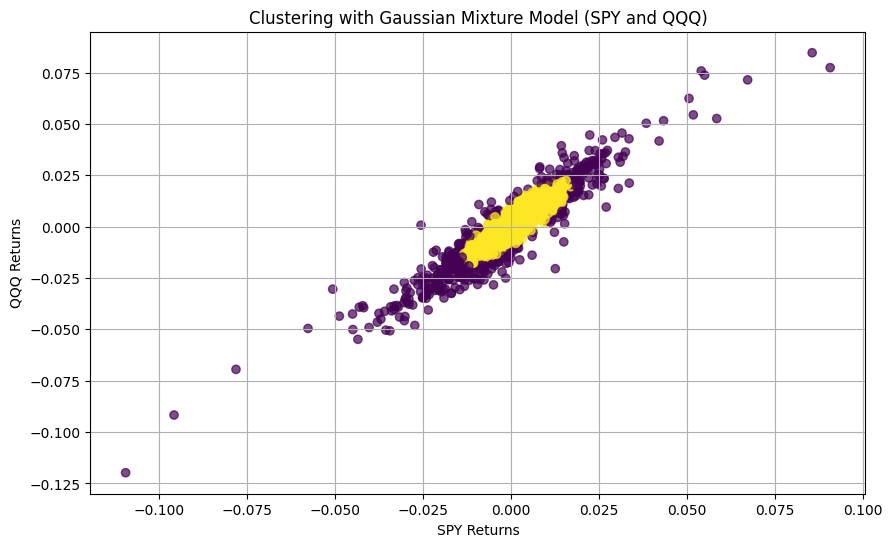

In [17]:
# Example: Use Gaussian Mixture Model for clustering

from sklearn.mixture import GaussianMixture

# Use SPY and QQQ returns for clustering
data_for_clustering = returns[['SPY', 'QQQ']].values

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(data_for_clustering)
labels = gmm.predict(data_for_clustering)

# Plot the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(data_for_clustering[:, 0], data_for_clustering[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('Clustering with Gaussian Mixture Model (SPY and QQQ)')
plt.xlabel('SPY Returns')
plt.ylabel('QQQ Returns')
plt.grid(True)
plt.show()
    